In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re

In [5]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [6]:
from path import PATH_AUTO_CSV, PATH_AUTO_XLSX

## 1 - Import Data

In [173]:
data = pd.read_csv(PATH_AUTO_CSV)

In [174]:
data2 = data.copy()

In [175]:
data2.head()

,car_name,carModele,CarPrice,Etat,Milieage,Tran,Annee,CarCar,CarPui,CarVen,technical_details,seats,Options,link
0,Chevrolet,Orlando,"€ 3 990,-5",Très bon prix,148 773 km,Boîte manuelle,07/2012,Diesel,120 kW (163 CH),Professionnel,7.0,5,120 kW (163 CH) Boîte manuelle 1 998 cm³ 6 4 1...,https://www.autoscout24.be/fr/offres/chevrolet...
1,BMW,318,"€ 3 990,-5",Très bon prix,207 348 km,Boîte manuelle,03/2010,Diesel,100 kW (136 CH),Professionnel,5.0,5,100 kW (136 CH) Boîte manuelle 1 995 cm³ 6 4,https://www.autoscout24.be/fr/offres/bmw-318-d...
2,Peugeot,5008,"€ 4 500,-5",Très bon prix,221 000 km,Boîte manuelle,01/2016,Diesel,85 kW (116 CH),Professionnel,7.0,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,https://www.autoscout24.be/fr/offres/peugeot-5...
3,Peugeot,208,"€ 4 950,-5",Très bon prix,118 431 km,Boîte manuelle,04/2018,Essence,50 kW (68 CH),Professionnel,5.0,5,50 kW (68 CH) Boîte manuelle 1 199 cm³ 5 3 1 0...,https://www.autoscout24.be/fr/offres/peugeot-2...
4,Volkswagen,Golf,"€ 5 999,-5",Très bon prix,133 000 km,Boîte manuelle,01/2010,Essence,59 kW (80 CH),Professionnel,5.0,3,59 kW (80 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,https://www.autoscout24.be/fr/offres/volkswage...


## 2 - EDA

#### 2 - 1 Nan Values

In [176]:
data2.isna().sum()

car_name             0
carModele            0
CarPrice             0
Etat                 0
Milieage             0
Tran                 0
Annee                0
CarCar               0
CarPui               0
CarVen               0
technical_details    2
seats                0
Options              0
link                 0
dtype: int64

<Axes: >

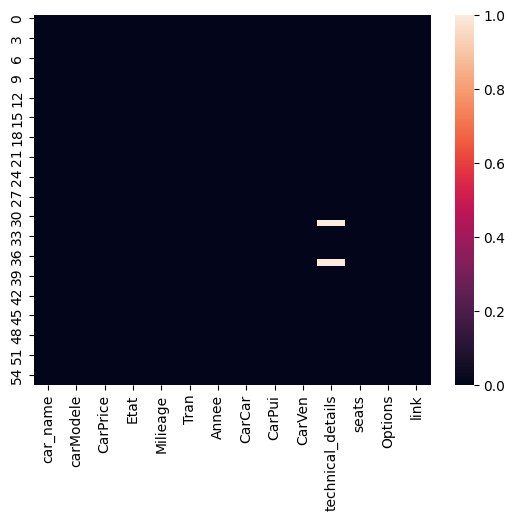

In [177]:
sns.heatmap(data2.isna())

#### 2 - 2 data-info

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           56 non-null     object 
 1   carModele          56 non-null     object 
 2   CarPrice           56 non-null     object 
 3   Etat               56 non-null     object 
 4   Milieage           56 non-null     object 
 5   Tran               56 non-null     object 
 6   Annee              56 non-null     object 
 7   CarCar             56 non-null     object 
 8   CarPui             56 non-null     object 
 9   CarVen             56 non-null     object 
 10  technical_details  54 non-null     float64
 11  seats              56 non-null     int64  
 12  Options            56 non-null     object 
 13  link               56 non-null     object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.2+ KB


#### 2 - 3 Data Cleaning

##### 2 - 3.1 FullCareName

In [179]:
def fillcareName(x,y) :
    return x.upper() + '-' + y.upper()

In [180]:
data2['fillcareName'] = data2.apply(lambda row : fillcareName(row['car_name'], row['carModele']), axis = 1)

##### 2 - 3.2 CarPrice

In [181]:
def extractPrice(text):
    cleaned_text = re.sub(r'[^\d]', '', text)  
    return int(cleaned_text[:-1]) 

In [182]:
data2['Price'] = data2['CarPrice'].apply(extractPrice)

##### 2 - 3.3 CarPrice

In [183]:
data2['Price'] = data2['CarPrice'].apply(extractPrice)

In [184]:
price_mapping = {
    "Très bon prix": 3,
    "Bon prix": 2,
    "Prix correct": 1,
    "Pas d'information": 0
}

In [185]:
data2['etatCategory'] = data2['Etat'].map(price_mapping)

##### 2 - 3.4 Milieage

In [186]:
def extract_kilometrage(text):
    return int(re.sub(r'[^\d]', '', text))

In [187]:
data2['Milieage'] = data2['Milieage'].apply(extract_kilometrage) 

##### 2 - 3.5 Annee

In [188]:
data2['Annee'].unique()

array(['07/2012', '03/2010', '01/2016', '04/2018', '01/2010', '02/2018',
       '06/2007', '06/2004', '05/2016', '07/2013', '09/2014', '04/2015',
       '06/2012', '06/2016', '04/2013', '10/2022', '08/2014', '01/2012',
       '02/2006', '12/2015', '12/2018', '01/2011', '02/2020', '06/2017',
       '07/2016', '11/2012', '12/2020', '06/2020', '10/2011', '01/2014',
       '02/2014', '03/2013', '05/2013', '11/2018', '-', '12/2007',
       '10/2012', '03/2016', '06/2005', '08/2015', '01/2018'],
      dtype=object)

In [189]:
def extract_month(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    months = dates_series.dt.month
    return months

In [190]:
def extract_year(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    year = dates_series.dt.year
    return year

In [191]:
data2['Month'] = extract_month(data2['Annee'])

C:\Users\abdel\AppData\Local\Temp\ipykernel_15544\3126567526.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


In [192]:
data2['Year'] = extract_year(data2['Annee'])

C:\Users\abdel\AppData\Local\Temp\ipykernel_15544\39930126.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


###### 2 - 3.6 Options

In [194]:
for i in range(8) :
    print(data2['Options'][i])

120 kW (163 CH) Boîte manuelle 1 998 cm³ 6 4 1 655 kg 
100 kW (136 CH) Boîte manuelle 1 995 cm³ 6 4 
85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 565 kg 
50 kW (68 CH) Boîte manuelle 1 199 cm³ 5 3 1 035 kg 
59 kW (80 CH) Boîte manuelle 1 390 cm³ 5 4 1 142 kg 
110 kW (150 CH) Boîte automatique 1 999 cm³ 4 
80 kW (109 CH) Boîte manuelle 1 560 cm³ 5 4 1 362 kg 
80 kW (109 CH) Boîte manuelle 1 587 cm³ 5 4 1 260 kg 


In [195]:
def extract_puissance(text):
    match = re.search(r'(\d{2,3})\s?kW', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Transmission type (manual or automatic)
def extract_transmission(text):
    match = re.search(r'(Boîte .+?)\s(\d)', text)
    if match:
        return match.group(1)  # Return as string
    return None

def extract_cylindree(detail):
    # Extract the cubic centimeters value and remove any spaces or special characters
    match = re.search(r'(\d{1,3}(?:[ ,]\d{3})*)\s*cm³', detail)
    if match:
        # Convert to integer and remove any spaces within the number
        return int(match.group(1).replace(' ', '').replace(',', ''))
    return None

# Function to extract Vitesses (Number of gears)
def extract_vitesses(text):
    match = re.search(r'(\d)\s?(\d)', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Cylindres (Number of cylinders)
def extract_weight(text):
    match = re.search(r'(\d+\s?\d+)\s?kg', text)
    if match:
        return int(match.group(1).replace('\u202f', '').replace(' ', ''))  # Remove special spaces and return as int
    return None

In [196]:
data2['PuissanceV2'] = data2['Options'].apply(extract_puissance)
data2['TransmissionV2'] = data2['Options'].apply(extract_transmission)
data2['CylindréeV2'] = data2['Options'].apply(extract_cylindree)
data2['VitessesV2'] = data2['Options'].apply(extract_vitesses)
data2['CylindresV2'] = data2['Options'].apply(extract_weight)

###### 2 - 3.7 HorsePower

In [212]:
def extract_number_ch(text):
    match = re.search(r'\((\d+)\s*CH\)', text) 
    if match:
        return int(match.group(1))  
    return None

In [213]:
data2['HorsePower'] = data2['CarPui'].apply(extract_number_ch)

In [198]:
pd.set_option('display.max_columns', None)

In [199]:
data2['link'][0]

'https://www.autoscout24.be/fr/offres/chevrolet-orlando-2-0-tdci-ltz-navi-airco-pdc-diesel-gris-5a419a2c-6298-4b98-85f9-6acdc946bebd'

In [214]:
data2

,car_name,carModele,CarPrice,Etat,Milieage,Tran,Annee,CarCar,CarPui,CarVen,technical_details,seats,Options,link,fillcareName,Price,etatCategory,Month,Year,PuissanceV2,TransmissionV2,CylindréeV2,VitessesV2,CylindresV2,HorsePower
0,Chevrolet,Orlando,"€ 3 990,-5",Très bon prix,148773,Boîte manuelle,07/2012,Diesel,120 kW (163 CH),Professionnel,7.0,5,120 kW (163 CH) Boîte manuelle 1 998 cm³ 6 4 1...,https://www.autoscout24.be/fr/offres/chevrolet...,CHEVROLET-ORLANDO,3990,3,7.0,2012.0,120,Boîte manuelle,1998,1,1655.0,163
1,BMW,318,"€ 3 990,-5",Très bon prix,207348,Boîte manuelle,03/2010,Diesel,100 kW (136 CH),Professionnel,5.0,5,100 kW (136 CH) Boîte manuelle 1 995 cm³ 6 4,https://www.autoscout24.be/fr/offres/bmw-318-d...,BMW-318,3990,3,3.0,2010.0,100,Boîte manuelle,1995,1,NaN,136
2,Peugeot,5008,"€ 4 500,-5",Très bon prix,221000,Boîte manuelle,01/2016,Diesel,85 kW (116 CH),Professionnel,7.0,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,https://www.autoscout24.be/fr/offres/peugeot-5...,PEUGEOT-5008,4500,3,1.0,2016.0,85,Boîte manuelle,1560,8,1565.0,116
3,Peugeot,208,"€ 4 950,-5",Très bon prix,118431,Boîte manuelle,04/2018,Essence,50 kW (68 CH),Professionnel,5.0,5,50 kW (68 CH) Boîte manuelle 1 199 cm³ 5 3 1 0...,https://www.autoscout24.be/fr/offres/peugeot-2...,PEUGEOT-208,4950,3,4.0,2018.0,50,Boîte manuelle,1199,5,1035.0,68
4,Volkswagen,Golf,"€ 5 999,-5",Très bon prix,133000,Boîte manuelle,01/2010,Essence,59 kW (80 CH),Professionnel,5.0,3,59 kW (80 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,5999,3,1.0,2010.0,59,Boîte manuelle,1390,5,1142.0,80
5,Land Rover,Discovery Sport,"€ 12 990,-1, 5",Pas d'information,131860,Boîte automatique,02/2018,Diesel,110 kW (150 CH),Professionnel,5.0,5,110 kW (150 CH) Boîte automatique 1 999 cm³ 4,https://www.autoscout24.be/fr/offres/land-rove...,LAND ROVER-DISCOVERY SPORT,129901,0,2.0,2018.0,110,Boîte automatique,1999,1,NaN,150
6,Volvo,C30,"€ 2 250,-5",Très bon prix,185414,Boîte manuelle,06/2007,Diesel,80 kW (109 CH),Professionnel,4.0,3,80 kW (109 CH) Boîte manuelle 1 560 cm³ 5 4 1 ...,https://www.autoscout24.be/fr/offres/volvo-c30...,VOLVO-C30,2250,3,6.0,2007.0,80,Boîte manuelle,1560,8,1362.0,109
7,Peugeot,Partner,"€ 1 950,-5",Pas d'information,131000,Boîte manuelle,06/2004,Essence,80 kW (109 CH),Professionnel,5.0,5,80 kW (109 CH) Boîte manuelle 1 587 cm³ 5 4 1 ...,https://www.autoscout24.be/fr/offres/peugeot-p...,PEUGEOT-PARTNER,1950,0,6.0,2004.0,80,Boîte manuelle,1587,8,1260.0,109
8,BMW,218,"€ 7 450,-5",Très bon prix,259000,Boîte automatique,05/2016,Diesel,110 kW (150 CH),Professionnel,5.0,5,110 kW (150 CH) Boîte automatique 1 995 cm³ 8 ...,https://www.autoscout24.be/fr/offres/bmw-218-a...,BMW-218,7450,3,5.0,2016.0,110,Boîte automatique,1995,1,1485.0,150
9,Citroen,C3 Picasso,"€ 3 000,-5",Très bon prix,187223,Boîte manuelle,07/2013,Diesel,68 kW (92 CH),Professionnel,5.0,5,68 kW (92 CH) Boîte manuelle 1 560 cm³ 5 4 1 3...,https://www.autoscout24.be/fr/offres/citroen-c...,CITROEN-C3 PICASSO,3000,3,7.0,2013.0,68,Boîte manuelle,1560,6,1352.0,92


In [216]:
data2.drop(["car_name", "carModele", "CarPrice", "Annee", "CarPui", "Options", "link"], axis = 1, inplace=True)

In [217]:
data2

,Etat,Milieage,Tran,CarCar,CarVen,technical_details,seats,fillcareName,Price,etatCategory,Month,Year,PuissanceV2,TransmissionV2,CylindréeV2,VitessesV2,CylindresV2,HorsePower
0,Très bon prix,148773,Boîte manuelle,Diesel,Professionnel,7.0,5,CHEVROLET-ORLANDO,3990,3,7.0,2012.0,120,Boîte manuelle,1998,1,1655.0,163
1,Très bon prix,207348,Boîte manuelle,Diesel,Professionnel,5.0,5,BMW-318,3990,3,3.0,2010.0,100,Boîte manuelle,1995,1,NaN,136
2,Très bon prix,221000,Boîte manuelle,Diesel,Professionnel,7.0,5,PEUGEOT-5008,4500,3,1.0,2016.0,85,Boîte manuelle,1560,8,1565.0,116
3,Très bon prix,118431,Boîte manuelle,Essence,Professionnel,5.0,5,PEUGEOT-208,4950,3,4.0,2018.0,50,Boîte manuelle,1199,5,1035.0,68
4,Très bon prix,133000,Boîte manuelle,Essence,Professionnel,5.0,3,VOLKSWAGEN-GOLF,5999,3,1.0,2010.0,59,Boîte manuelle,1390,5,1142.0,80
5,Pas d'information,131860,Boîte automatique,Diesel,Professionnel,5.0,5,LAND ROVER-DISCOVERY SPORT,129901,0,2.0,2018.0,110,Boîte automatique,1999,1,NaN,150
6,Très bon prix,185414,Boîte manuelle,Diesel,Professionnel,4.0,3,VOLVO-C30,2250,3,6.0,2007.0,80,Boîte manuelle,1560,8,1362.0,109
7,Pas d'information,131000,Boîte manuelle,Essence,Professionnel,5.0,5,PEUGEOT-PARTNER,1950,0,6.0,2004.0,80,Boîte manuelle,1587,8,1260.0,109
8,Très bon prix,259000,Boîte automatique,Diesel,Professionnel,5.0,5,BMW-218,7450,3,5.0,2016.0,110,Boîte automatique,1995,1,1485.0,150
9,Très bon prix,187223,Boîte manuelle,Diesel,Professionnel,5.0,5,CITROEN-C3 PICASSO,3000,3,7.0,2013.0,68,Boîte manuelle,1560,6,1352.0,92
